<a href="https://colab.research.google.com/github/Arif111866/Indor_data_set_object_detection_by_YOLOv5-YOLOv8-YOLOV11/blob/main/Train_and_test_indoor_dataset_in_yolo_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [2]:
!pip cache purge
!pip install --upgrade pip setuptools wheel
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


Files removed: 0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, which is not installed.
fastai 2.7.19 requires torchvision>=0.11, which is not installed.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 189.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 139.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 150.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 768.5/768.5 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.

In [3]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 17483 (delta 77), reused 29 (delta 29), pack-reused 17378 (from 4)
Receiving objects: 100% (17483/17483), 16.35 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ultralytics]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive/Colab Notebooks/datasets/indor image for yolo dataset.zip

In [5]:
import zipfile

zip_path = '/content/drive/MyDrive/Colab Notebooks/datasets/indor image for yolo dataset.zip'
extract_path = '/content/indoor_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

!mv /content/indoor_dataset/valid /content/indoor_dataset/val


In [6]:
yaml_content = """
train: /content/indoor_dataset/train/images
val: /content/indoor_dataset/val/images

nc: 10
names: ['door', 'openedDoor', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'sofa/couch', 'pole']
"""

with open('/content/indoor_dataset/data.yaml', 'w') as f:
    f.write(yaml_content)


In [7]:
%cd /content/yolov5
%ls
!python train.py --img 640 --batch 16 --epochs 50 --data /content/indoor_dataset/data.yaml --cfg yolov5s.yaml --weights yolov5s.pt --name indoor_yolo5_run


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      12/49      4.81G    0.04591    0.05189    0.01407        158        640:  58% 37/64 [00:26<00:19,  1.40it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      12/49      4.81G    0.04585    0.05169    0.01393        132        640:  59% 38/64 [00:27<00:16,  1.56it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      12/49      4.81G    0.04582    0.05192    0.01392        173        640:  61% 39/64 [00:28<00:22,  1.11it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):


In [8]:
%cd /content/yolov5
!python val.py --weights runs/train/indoor_yolo5_run/weights/best.pt --data /content/indoor_dataset/data.yaml --img 640


/content/yolov5
val: data=/content/indoor_dataset/data.yaml, weights=['runs/train/indoor_yolo5_run/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/indoor_dataset/val/labels.cache... 230 images, 31 backgrounds, 0 corrupt: 100% 230/230 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 8/8 [00:08<00:00,  1.01s/it]
                   all        230       1289       0.53      0.462      0.434      0.239
                  door        230         97      0.515      0.546      0.5

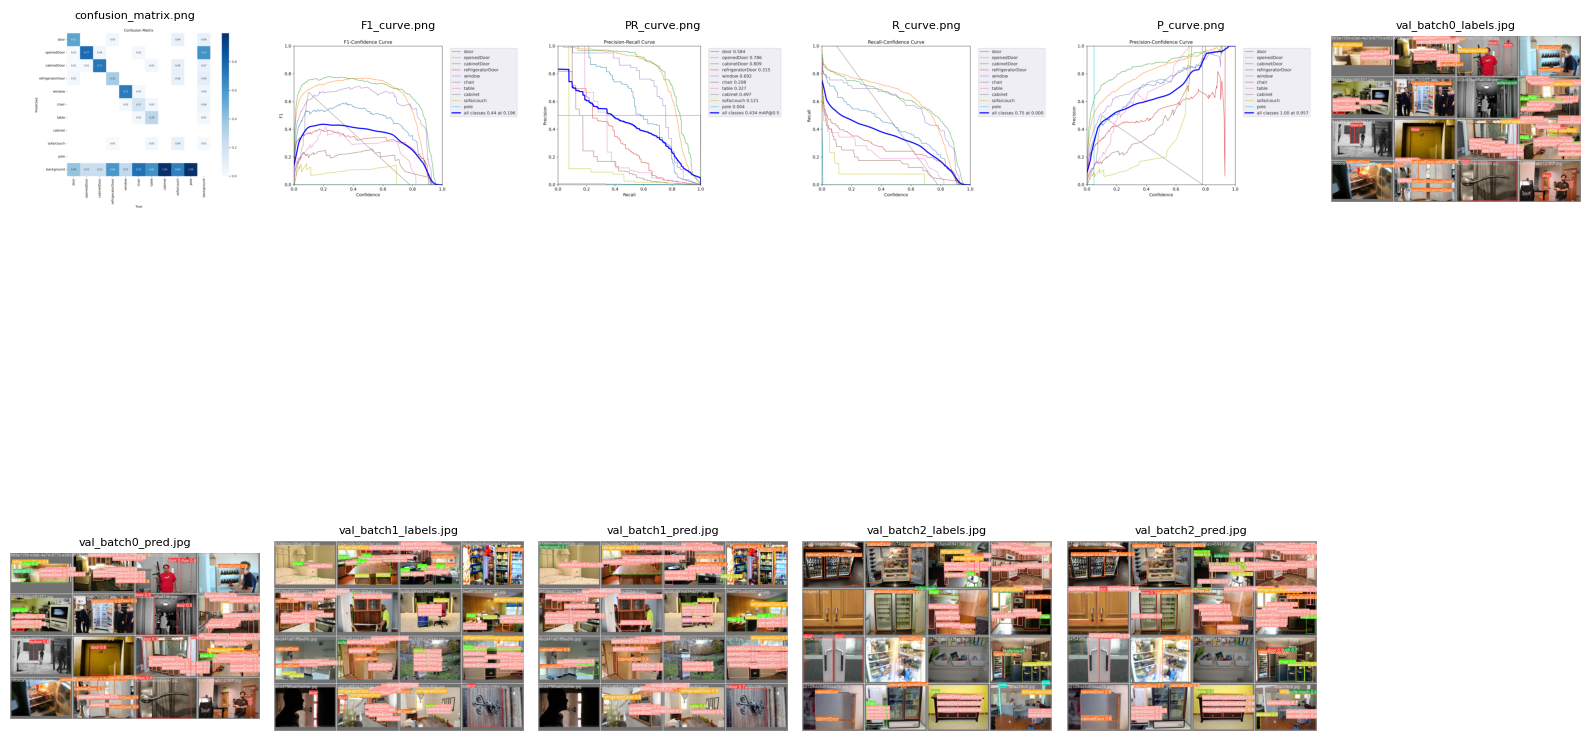

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

result_dir = '/content/yolov5/runs/val/exp'
image_files = [
    'confusion_matrix.png', 'F1_curve.png', 'PR_curve.png', 'R_curve.png', 'P_curve.png',
    'val_batch0_labels.jpg', 'val_batch0_pred.jpg',
    'val_batch1_labels.jpg', 'val_batch1_pred.jpg',
    'val_batch2_labels.jpg', 'val_batch2_pred.jpg'
]

plt.figure(figsize=(16, 12))

for idx, file in enumerate(image_files):
    img_path = os.path.join(result_dir, file)
    img = mpimg.imread(img_path)
    plt.subplot(2, 6, idx + 1)
    plt.imshow(img)
    plt.title(file, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
!python detect.py --weights runs/train/indoor_yolo5_run/weights/best.pt --img 640 --source /content/indoor_dataset/val/images --conf 0.25


detect: weights=['runs/train/indoor_yolo5_run/weights/best.pt'], source=/content/indoor_dataset/val/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
image 1/230 /content/indoor_dataset/val/images/000cf08de329f81b.jpg: 480x640 1 door, 1 refrigeratorDoor, 32.7ms
image 2/230 /content/indoor_dataset/val/images/000d61ba9ffa87db.jpg: 448x640 3 doors, 30.3ms
image 3/230 /content/indoor_dataset/val/images/00bb967bc89e040f.jpg: 640x480 4 

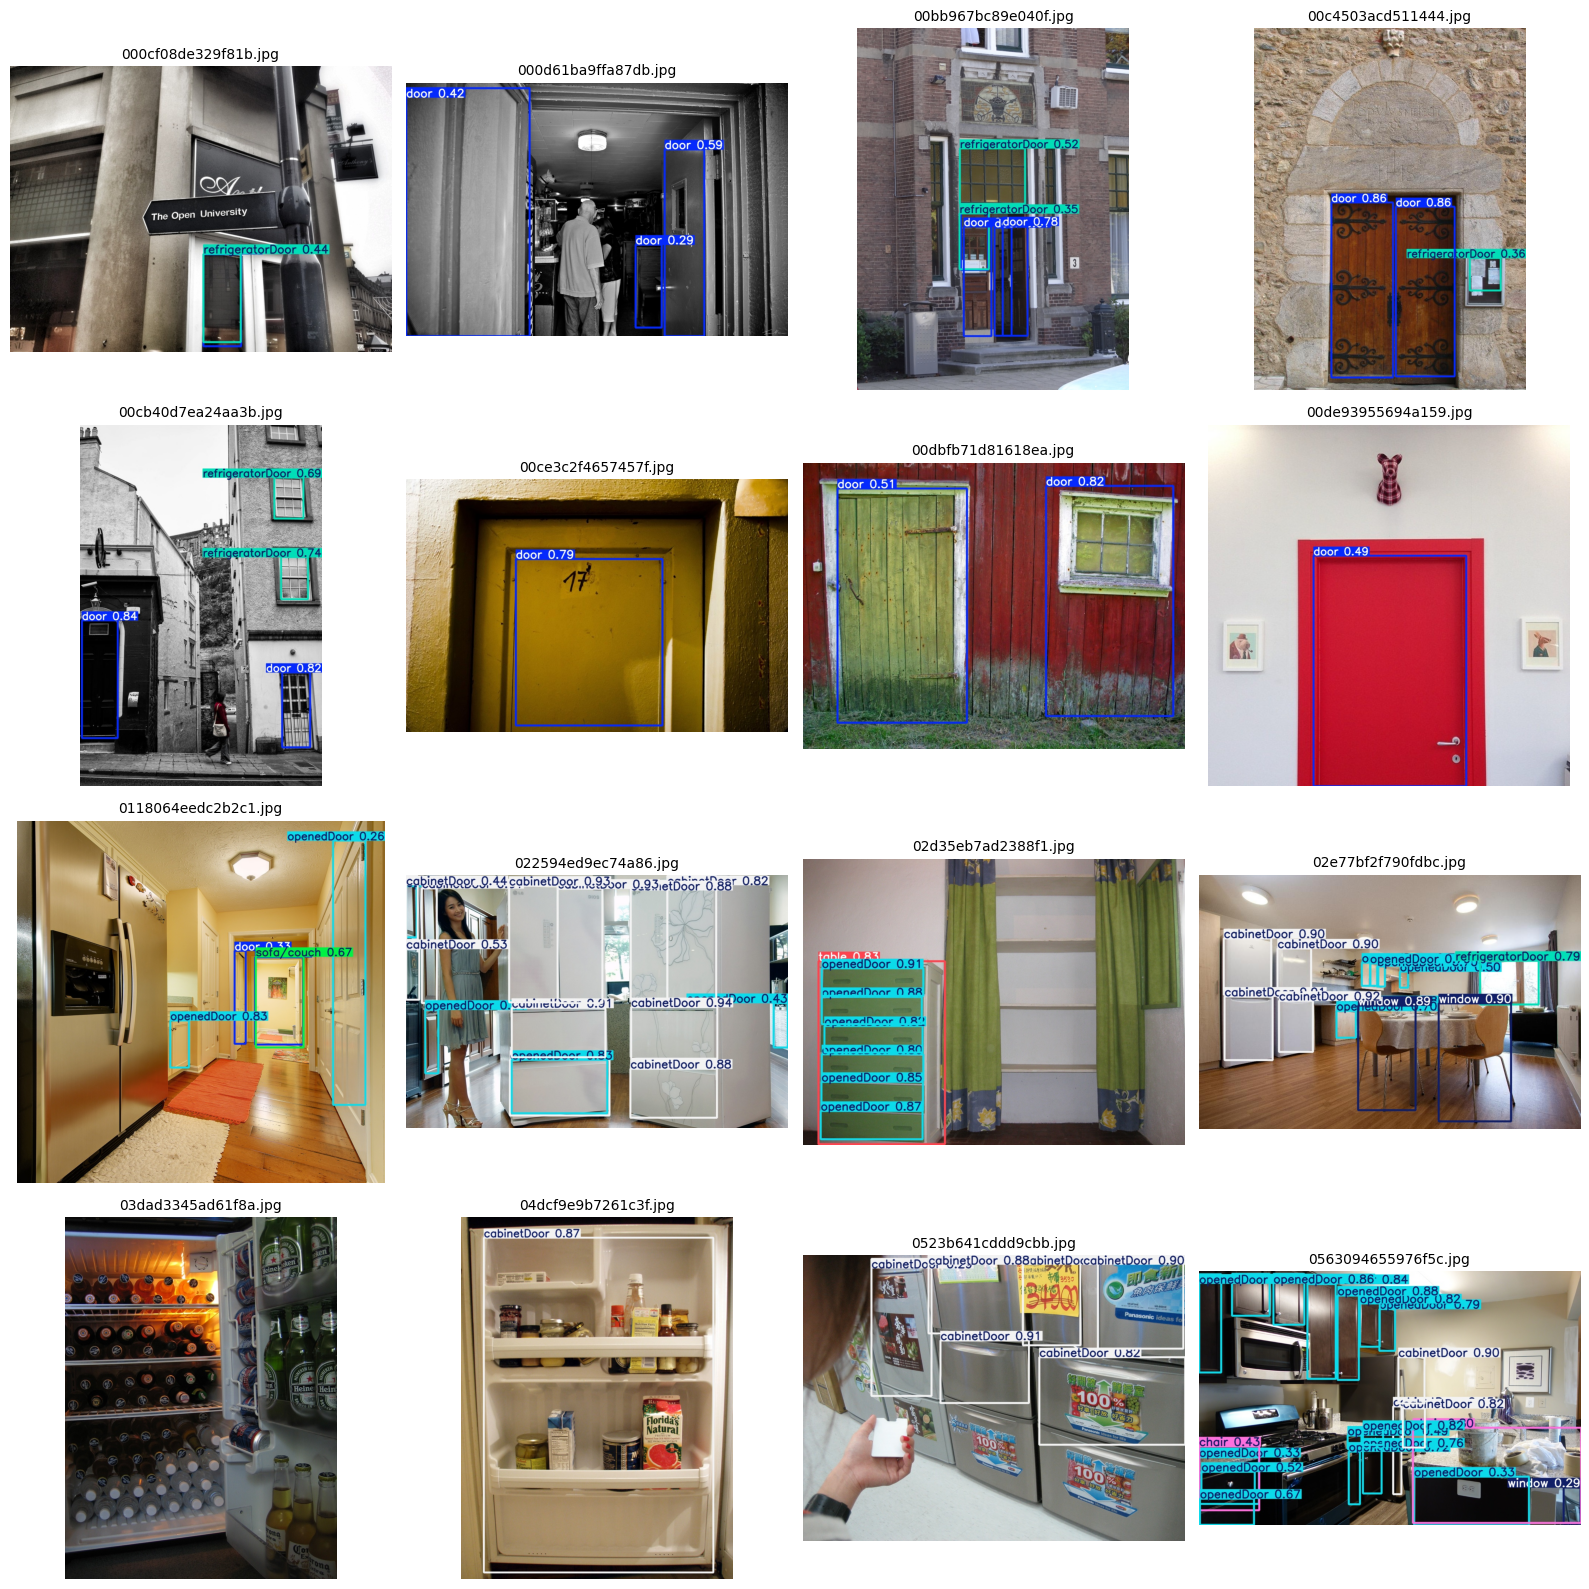

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the detection results
result_path = '/content/yolov5/runs/detect/exp'
image_files = sorted(os.listdir(result_path))[:16]  # Get up to 16 images

# Set up the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, ax in enumerate(axes.flat):
    if i < len(image_files):
        img = mpimg.imread(os.path.join(result_path, image_files[i]))
        ax.imshow(img)
        ax.set_title(image_files[i], fontsize=10)
        ax.axis('off')
    else:
        ax.axis('off')  # Hide unused axes

plt.tight_layout()
plt.show()
